# **Project: HR Data Analysis and Recommendations**

## Project Description



This project involves analyzing employee data collected by the HR department of a consulting firm. The objective is to provide data-driven insights and recommendations to improve employee satisfaction and retention rates.

The aim of this project is to analyze the collected data and build a predictive model that can determine whether an employee is likely to leave the company. By identifying factors contributing to employee attrition, recommendations can be made to improve retention strategies.

## Business challenge



The HR department seeks to understand the causes of employee attrition. Identifying the factors behind employee departures will enable the company to implement strategies that enhance employee satisfaction, retention, and mitigate the expenses associated with recruiting and training new staff.

## Import packages & load dataset

In [ ]:
## Import necessary librabries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
import pickle

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)


In [ ]:
## Load data from local drive

from google.colab import files
import io
uploaded=files.upload()

Saving HR_dataset.csv to HR_dataset.csv


In [ ]:
df = pd.read_csv(io.StringIO(uploaded['HR_dataset.csv'].decode('utf-8')))

In [ ]:
# Display

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Perform EDA (rename columns, missing values, duplicates, outliers, data visualization, data types)

In [ ]:
# Get data Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# Descriptive statistics

df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


The target column "left" represents whether an employee has left (1) the company or stayed (0).

Since the mean is below 0.5, it suggests that the dataset is slightly imbalanced towards the stayed (0). In other words, there are more instances of employees who stayed (0) compared to those who left (1).

In [ ]:
# Display column names

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
# Rename necessary columns

df= df.rename(columns={'Work_accident': 'work_accident', 'average_montly_hours': 'average_monthly_hours', 'time_spend_company': 'tenure','Department': 'department'})


In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

#### Check for duplicates

In [ ]:
# Check for duplicates

df.duplicated().sum()


3008

3,008 rows contain duplicates. That is about 20% of the data.

In [ ]:
# Inspect some rows containing duplicates

df[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


The output reveals duplicated rows, which are likely illegitimate entries since different employees cannot have identical data. It is advisable to drop these duplicated rows without conducting a detailed likelihood analysis.

In [ ]:
# Drop duplicates and save result in df1

df1 = df.drop_duplicates(keep='first')

df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Check for outliers

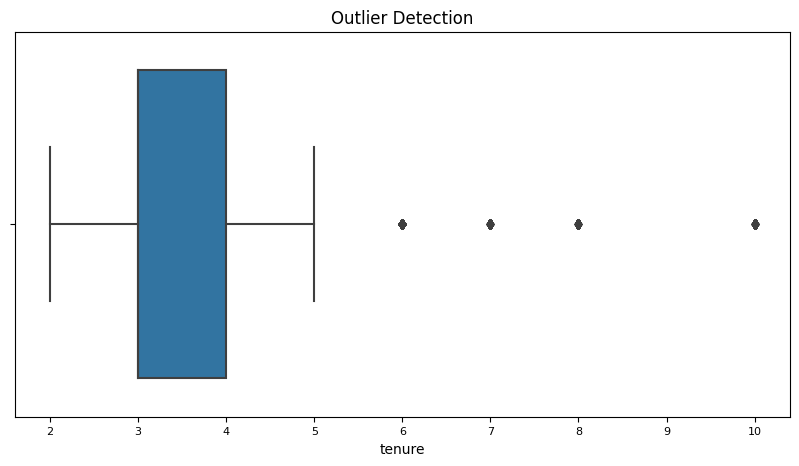

In [ ]:
# visualize distribution of `tenure` to detect any outliers

plt.figure(figsize=(10,5))
plt.title('Outlier Detection')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.boxplot(x=df1['tenure'])
plt.show();


In [ ]:
# Determine the number of rows containing outliers in (tenure column)

#  25th percentile
percentile25 = df1['tenure'].quantile(0.25)

#  75th percentile
percentile75 = df1['tenure'].quantile(0.75)

#  interquartile range
iqr = percentile75 - percentile25

print("25th percentile value:", percentile25)
print("75th percentile value:", percentile75)
print("interquartile range:", iqr)

25th percentile value: 3.0
75th percentile value: 4.0
interquartile range: 1.0


In [ ]:
# Define the upper limit and lower limit for non-outlier values

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers
print("Number of rows in the data containing outliers:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers: 824


##### During model development, it's crucial to consider the sensitivity of different models to outliers. This involves assessing whether to remove outliers based on the specific model being used.

### Data visualizations: create plots to visualize relationships between variables

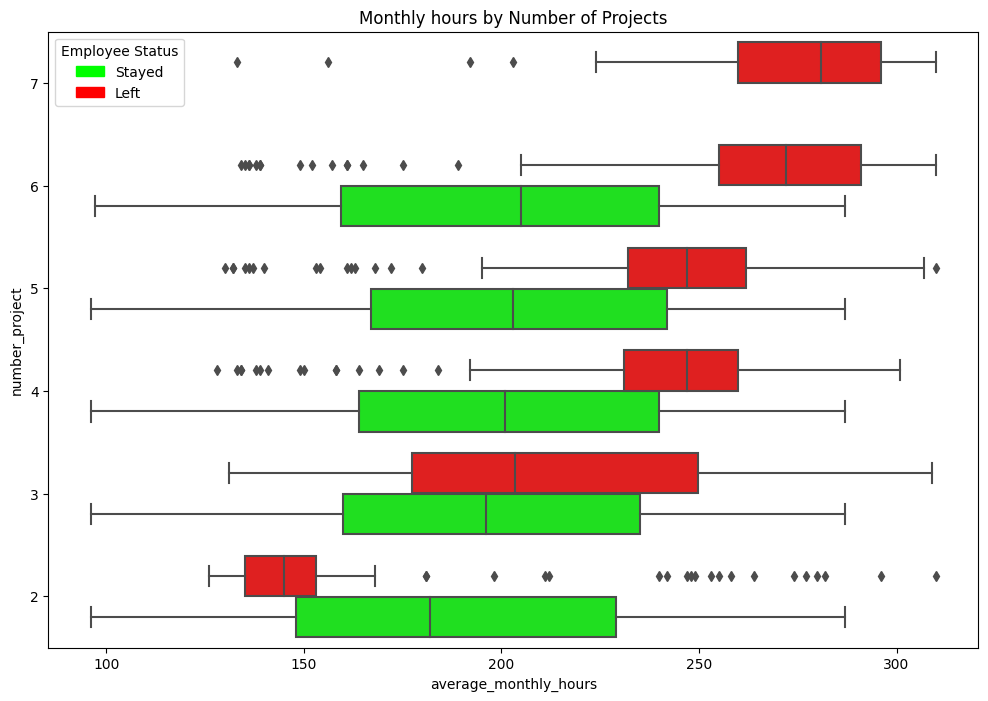

In [ ]:
# plot a Boxplot to show `average_monthly_hours` distributions for `number_project`

# compare employees who stayed VS who left

plt.figure(figsize=(12, 8))
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h" , palette=['#00ff00', '#ff0000' ])
plt.gca().invert_yaxis()
plt.title('Monthly hours by Number of Projects', fontsize='12')

##### Set legend labels and colors
legend_labels = ['Stayed', 'Left']
legend_colors = ['#00ff00', '#ff0000']
handles = [mpatches.Patch(color=color) for color in legend_colors]

##### Customize legend
plt.legend(handles, legend_labels, title='Employee Status', loc='upper left')

plt.show();

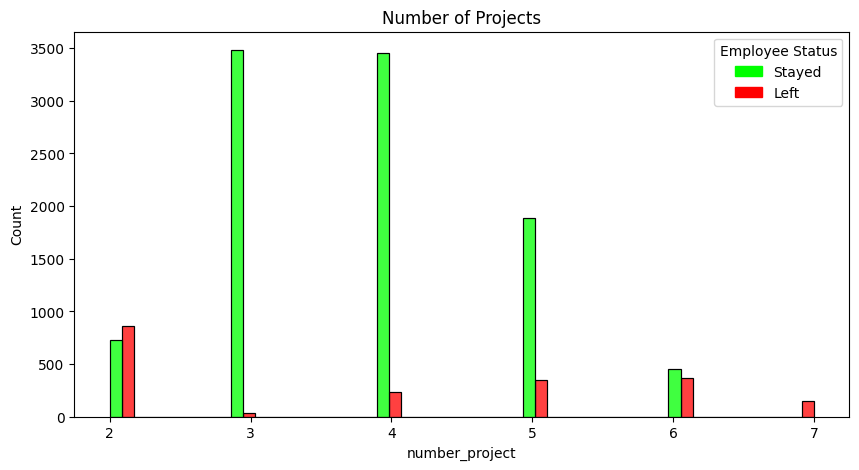

In [ ]:
# plot Histogram to show distribution of `number_project`

# compare employees who stayed VS who left

plt.figure(figsize=(10, 5))
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', palette=['#00ff00', '#ff0000' ]) #hue_order=['Stayed', 'Left']
plt.title('Number of Projects', fontsize='12')

##### Set legend labels and colors
legend_labels = ['Stayed', 'Left']
legend_colors = ['#00ff00', '#ff0000']
handles = [mpatches.Patch(color=color) for color in legend_colors]

##### Customize legend
plt.legend(handles, legend_labels, title='Employee Status', loc='upper right')

plt.show();


Insights observed from the plots:

*   2 distinct groups of employees who left can be identified: (A) those who worked fewer hours compared to peers with the same projects, possibly indicating termination or impending departure, and (B) those who worked more hours, suggesting resignation.

*   Employees with 7 projects consistently left, and those with 6 projects had a high tendency to leave, indicating a correlation between project count and attrition.

*   Employees with 3-4 projects had a lower likelihood of leaving, suggesting an optimal workload range.

*   Most employee groups, worked more hours per month than the assumed standard of 166.67 hours (40 hours per week for 50 weeks divided by 12 months), indicating a potential issue of overworking.

#### Visualize the relationship between Monthly Hours and Satisfaction Level

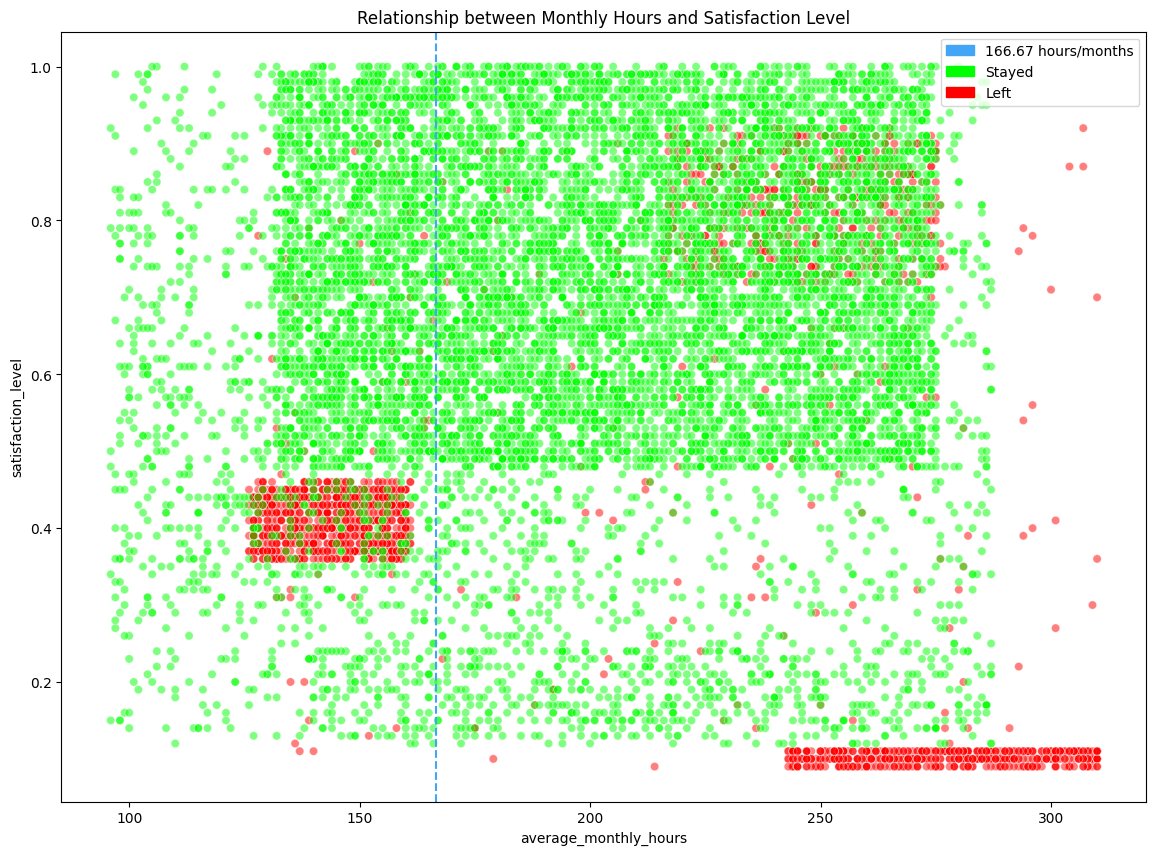

In [ ]:
# Plot a scatterplot to compare employees who stayed VS who left

plt.figure(figsize=(14, 10))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.5, palette=['#00ff00', '#ff0000' ])
plt.axvline(x=166.67, color='#42a5f5', label='166.67 hours/months', ls='--')
plt.title('Relationship between Monthly Hours and Satisfaction Level', fontsize='12')

##### Set legend labels and colors
legend_labels = ['166.67 hours/months', 'Stayed', 'Left']
legend_colors = ['#42a5f5', '#00ff00', '#ff0000']
handles = [mpatches.Patch(color=color) for color in legend_colors]

##### Customize legend
plt.legend(handles, legend_labels, loc='upper right')

plt.show();

Insights from the scatterplot:

*  There is a group of employees who worked long hours (around 245-320 hours per month) and had low satisfaction levels, possibly indicating dissatisfaction and potential reasons for leaving.

*  Another group of employees who left had more normal working hours but still had low satisfaction levels (around 0.4), suggesting that factors other than excessive workload might have contributed to their departure.

*  There is a distinct group of employees who worked moderate hours (around 220-280 hours per month) and had higher satisfaction levels (around 0.7-0.9)

*  It's worth noting that the distribution shapes in the scatterplot appear unusual, indicating the possibility of data manipulation or synthetic data.

#### Visualize the relationship between satisfaction levels by tenure

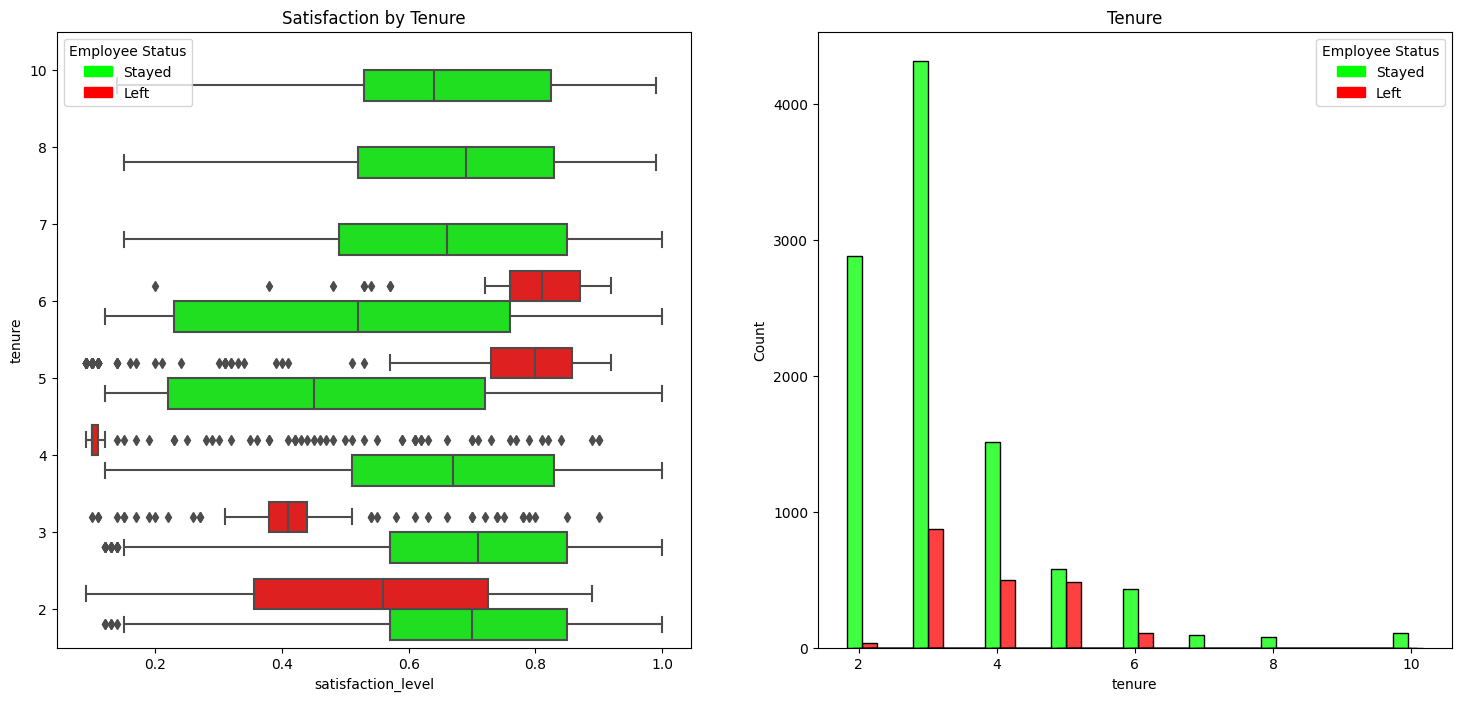

In [ ]:
# compare employees who stayed VS who left

# Set up the axes and figuresize

fig, ax = plt.subplots(1, 2, figsize=(18, 8))

### Plot a boxplot to show the relationship between satisfaction level and tenure

sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0], palette=['#00ff00', '#ff0000']) #hue_order=['Stayed', 'Left']
ax[0].invert_yaxis()
ax[0].legend(labels=['Stayed', 'Left'])
ax[0].set_title('Satisfaction by Tenure', fontsize='12')

### Plot a histogram to visualize the distribution of tenure

tenure_stay = df1[df1['left'] == 0]['tenure']
tenure_left = df1[df1['left'] == 1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1], palette=['#00ff00', '#ff0000']) #hue_order=['Stayed', 'Left']
ax[1].set_title('Tenure', fontsize='12')

### Set legend labels and colors
legend_labels = ['Stayed', 'Left']
legend_colors = ['#00ff00', '#ff0000']
handles = [mpatches.Patch(color=color) for color in legend_colors]

##### Customize legend
ax[0].legend(handles, legend_labels, title='Employee Status', loc='upper left')
ax[1].legend(handles, legend_labels, title='Employee Status', loc='upper right')

plt.show();


Observations from the plot:

*  Employees who left the company can be categorized into two groups: dissatisfied employees with shorter tenures and highly satisfied employees with medium-length tenures.

*  Notably, employees with a tenure of four years and who left the company exhibit an unusually low satisfaction level. It would be beneficial to investigate any policy changes or events that might have impacted employees specifically at the four-year mark.

*  The plot also indicates that employees with the longest tenures did not leave the company. Their satisfaction levels align with those of newer employees who stayed.

*  Additionally, the histogram illustrates that there are relatively few employees with longer tenures. This suggests that they might be higher-ranking or higher-paid individuals within the organization.

#### Mean and Median satisfaction scores

In [ ]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed

df1.groupby('left')['satisfaction_level'].agg(['mean', 'median'])

#df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Observations from the result:

*  The mean and median scores of employees who left the company are lower compared to those who stayed.

*  Among employees who stayed, the mean satisfaction score is slightly below the median score. This suggests that the distribution might be skewed to the left, indicating a higher concentration of employees with relatively lower satisfaction scores.

These observations provide insights into the differences in satisfaction levels between employees who left and those who stayed.

#### Examine the salary levels for different tenures.

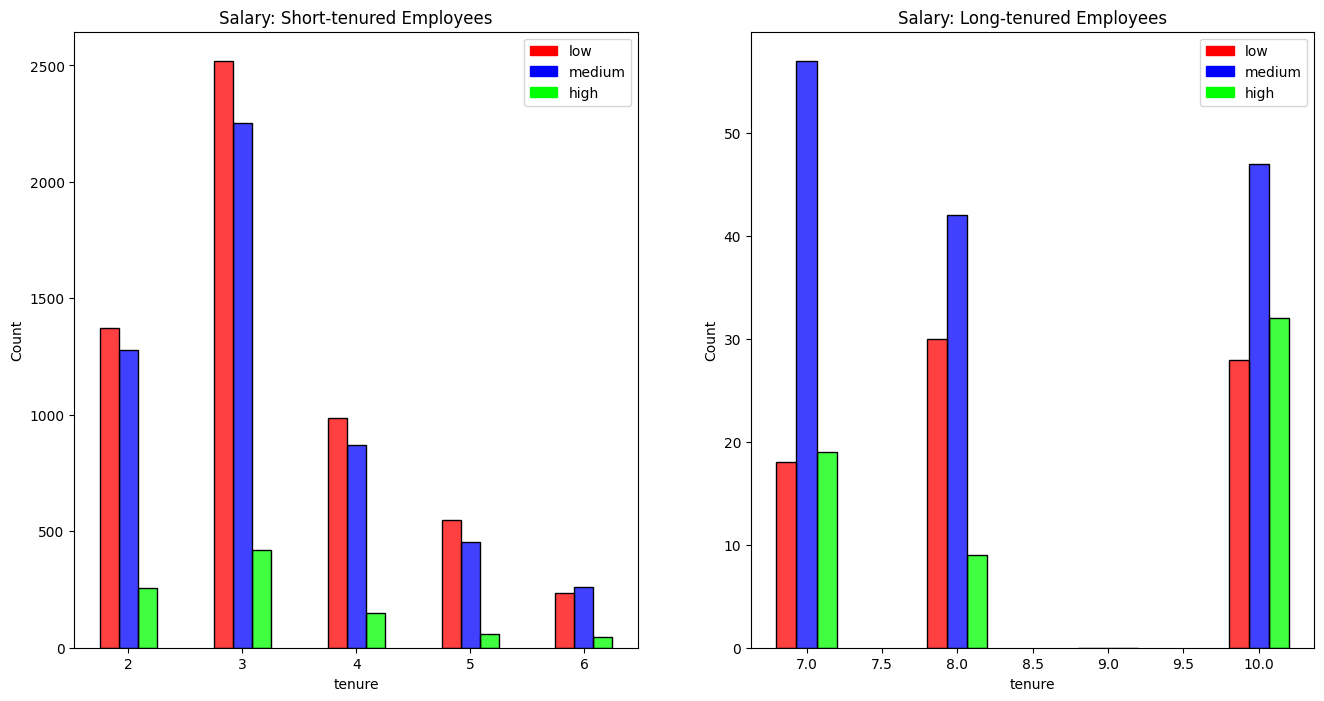

In [ ]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (16,8))

# short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# plot for short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, hue_order=['low', 'medium', 'high'],
             multiple='dodge', shrink=.5, ax=ax[0], palette=['#ff0000', '#0000ff', '#00ff00'])
ax[0].set_title('Salary: Short-tenured Employees', fontsize='12')

# plot for long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, hue_order=['low', 'medium', 'high'],
             multiple='dodge', shrink=.4, ax=ax[1], palette=['#ff0000', '#0000ff', '#00ff00'])
ax[1].set_title('Salary: Long-tenured Employees', fontsize='12');

### Set legend labels and colors
legend_labels = ['low', 'medium', 'high']
legend_colors = ['#ff0000', '#0000ff', '#00ff00']
handles = [mpatches.Patch(color=color) for color in legend_colors]

### Customize legend
ax[0].legend(handles, legend_labels, loc='upper right')
ax[1].legend(handles, legend_labels, loc='upper right')

plt.show();

The plots above indicate that there is no significant association between longer tenure and higher salary levels among the employees.

#### Explore whether there's a correlation between working long hours and receiving high evaluation scores.

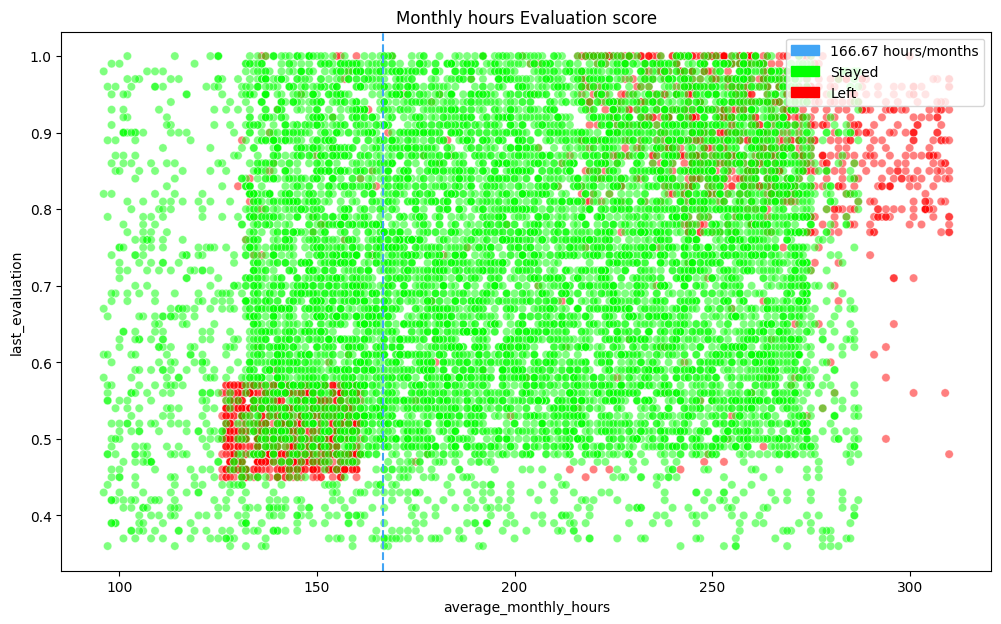

In [ ]:
# plot a scatterplot of `average_monthly_hours` VS `last_evaluation`

# compare employees who stayed VS those who left

plt.figure(figsize=(12, 7))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.5, palette=['#00ff00', '#ff0000' ])
plt.axvline(x=166.67, color='#42a5f5', label='166.67 hours/months', ls='--')
plt.title('Monthly hours Evaluation score', fontsize='12')

##### Set legend labels and colors

legend_labels = ['166.67 hours/months', 'Stayed', 'Left']
legend_colors = ['#42a5f5', '#00ff00', '#ff0000']
handles = [mpatches.Patch(color=color) for color in legend_colors]

##### Customize legend

plt.legend(handles, legend_labels, loc='upper right')

plt.show();

The scatterplot reveals several insights:

*  Employees who left the company can be divided into 2 groups: those who were overworked and performed exceptionally well, and those who worked slightly below the average monthly hours of 166.67 with lower evaluation scores.

*  There is a correlation between the number of hours worked and the evaluation score. Generally, higher evaluation scores are associated with longer working hours.

*  The upper-left quadrant of the plot, indicating employees with high evaluation scores and shorter working hours, is sparsely populated. This suggests that working long hours does not guarantee a good evaluation score.

*  The majority of employees in the company work significantly more than the assumed average of 166.67 hours per month.

#### Investigate whether employees who worked very long hours were promoted within the last 5 years.

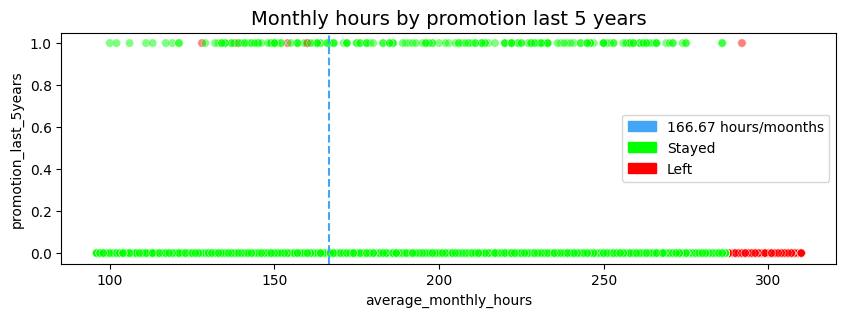

In [ ]:
# Visualize the relationship between `average_monthly_hours` and `promotion_last_5years`

# compare employees who stayed VS those who left

plt.figure(figsize=(10, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.5, palette=['#00ff00', '#ff0000' ])
plt.axvline(x=166.67, color='#42a5f5', ls='--')
plt.legend(labels=['166.67 hours/moonths', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14')

##### Set legend labels and colors

legend_labels = ['166.67 hours/moonths', 'Stayed', 'Left']
legend_colors = ['#42a5f5', '#00ff00', '#ff0000']
handles = [mpatches.Patch(color=color) for color in legend_colors]

##### Customize legend

plt.legend(handles, legend_labels, loc='center right')

plt.show();

The plot above shows:

*  Only few employees who were promoted in the last five years left

*  Only few employees who worked the most hours were promoted

*  All the employees who left were working the longest hours

#### Employees distribution across departments.

In [ ]:
# Display counts for each department

df1["department"].value_counts()


sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

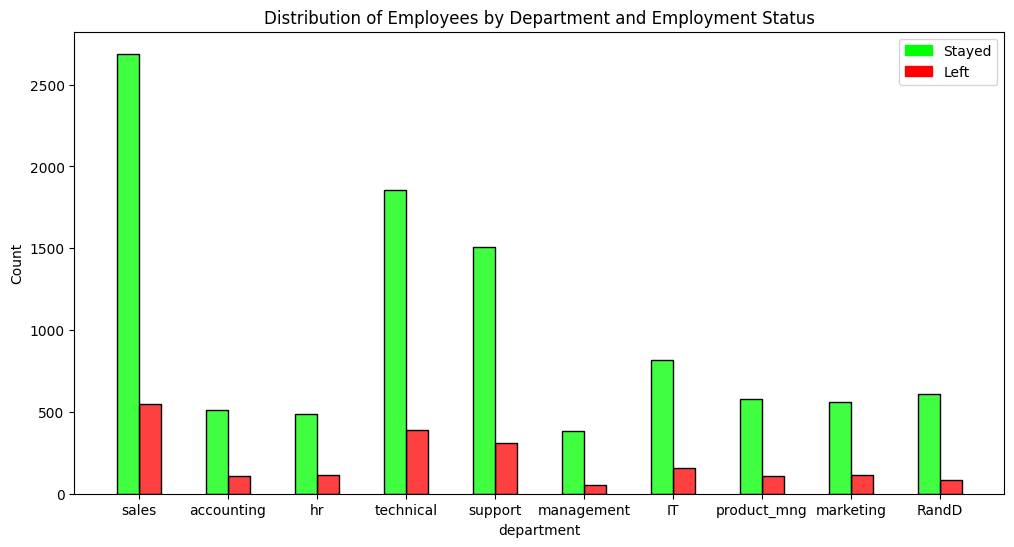

In [ ]:
# plot a histogram to compare department distribution of employees who left VS employees who didn't

plt.figure(figsize=(12,6))
sns.histplot(data=df1, x='department', hue='left', discrete=1, hue_order=[0, 1],
             multiple='dodge', shrink=0.5, palette=['#00ff00', '#ff0000' ])
plt.title('Distribution of Employees by Department and Employment Status', fontsize=12)

##### Set legend labels and colors
legend_labels = ['Stayed', 'Left']
legend_colors = ['#00ff00', '#ff0000']
handles = [mpatches.Patch(color=color) for color in legend_colors]

##### Customize legend
plt.legend(handles, legend_labels, loc='upper right')

plt.show();


#### Investigate the correlations between variables in the data

<ipython-input-42-b731818b756d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm")


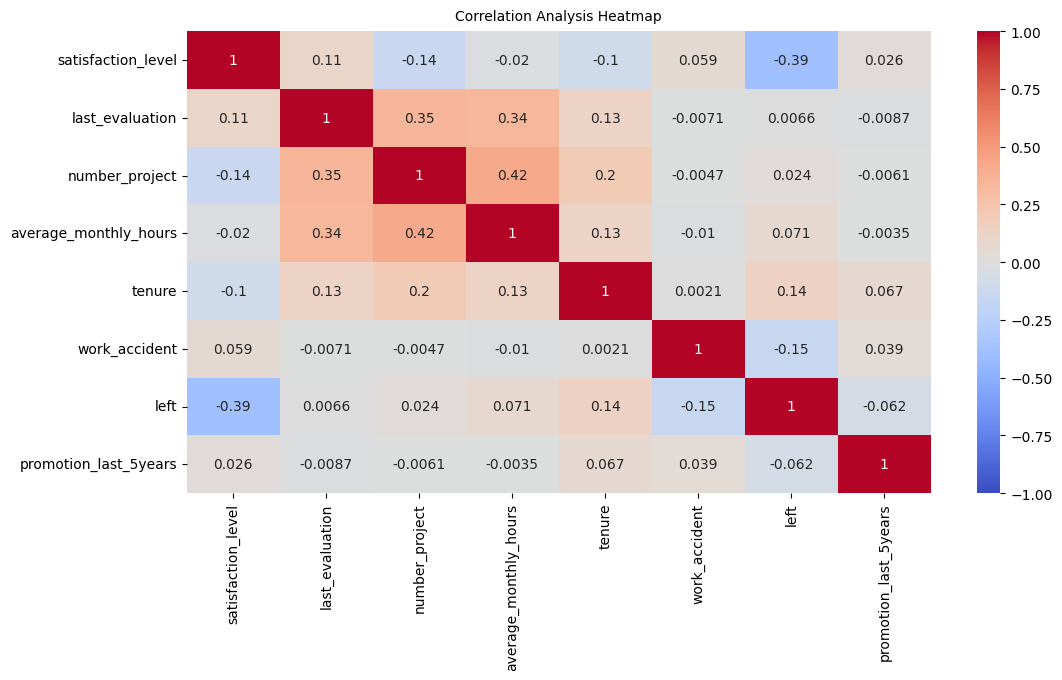

In [ ]:
# Plot a correlation heatmap

plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
heatmap.set_title('Correlation Analysis Heatmap', fontdict={'fontsize':10}, pad=8)

plt.show();

Based on the correlation heatmap, several observations can be made:

*  The number of projects, monthly hours, and evaluation scores show positive correlations with each other. This suggests that employees who work on more projects tend to work longer hours and receive higher evaluation scores.

*  On the other hand, the satisfaction level is negatively correlated with the likelihood of an employee leaving. This implies that employees with lower satisfaction levels are more likely to leave the company.

*  These findings highlight the interplay between various factors and their impact on employee attrition.

### Key Findings on analysis

##### The analysis uncovers several significant findings regarding employee attrition within the company:

*  Relationship to Poor Management: Employees are more likely to leave when subjected to longer working hours, handling numerous projects simultaneously, and experiencing lower levels of job satisfaction. These factors suggest a potential connection between inadequate management practices and increased employee turnover.

*  Impact of Workload and Recognition: The absence of promotions or favorable evaluation scores in conjunction with extensive working hours may lead to employee dissatisfaction and a higher propensity to leave. This indicates the importance of appropriately recognizing and rewarding employees for their efforts to maintain their engagement and commitment.

*  Burnout Risk: A distinct group of employees appears to be at risk of burnout due to the demanding nature of their roles. Their high workload and potentially limited support systems may contribute to dissatisfaction and ultimately result in increased attrition rates. Implementing strategies to address burnout and enhance work-life balance for these employees is crucial.

*  Tenure and Loyalty: Interestingly, employees with longer tenure (over six years) exhibit a higher likelihood of staying with the company. This suggests that these individuals may have developed a sense of job satisfaction, loyalty, or other favorable factors that contribute to their retention.

These key findings emphasize the significance of effective workload management, career advancement opportunities, and prioritizing employee well-being to mitigate attrition and foster a more fulfilling work environment.


## Machine learning model development

To predict whether an employee will leave the company or not, we need to select a model that is well-suited for this task. Since the target variable is categorical, we have 2 potential models to consider: Logistic Regression and Random Forest.

*  **Logistic Regression**: It estimates the probability of an event occurring based on input variables. In this case, it can predict the likelihood of an employee leaving the company given their characteristics and other relevant factors.

*  **Random Forest**: is an ensemble learning method that combines multiple decision trees to make predictions. It is known for its ability to handle complex relationships in the data. By using Random Forest, we can capture the non-linear interactions between variables and potentially achieve higher prediction accuracy.

I will implement both models and compare their performance to determine which one yields better results.

### Logistic Regression

#### Convert categorical variables into numerical.

In [ ]:
# Use One-hot encoding to convert the categorical variables to numerical and save result in df_encoder

df_encoder = pd.get_dummies(df1, prefix=['salary', 'dept'], columns = ['salary', 'department'], drop_first=False)

# Display

df_encoder.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


#### Visualize Correlations between Variables

To better understand the relationships between variables and their correlations, we can create a heatmap. This will provide a graphical representation of the correlation matrix, allowing us to identify which variables are strongly correlated and potentially influential in predicting employee attrition.

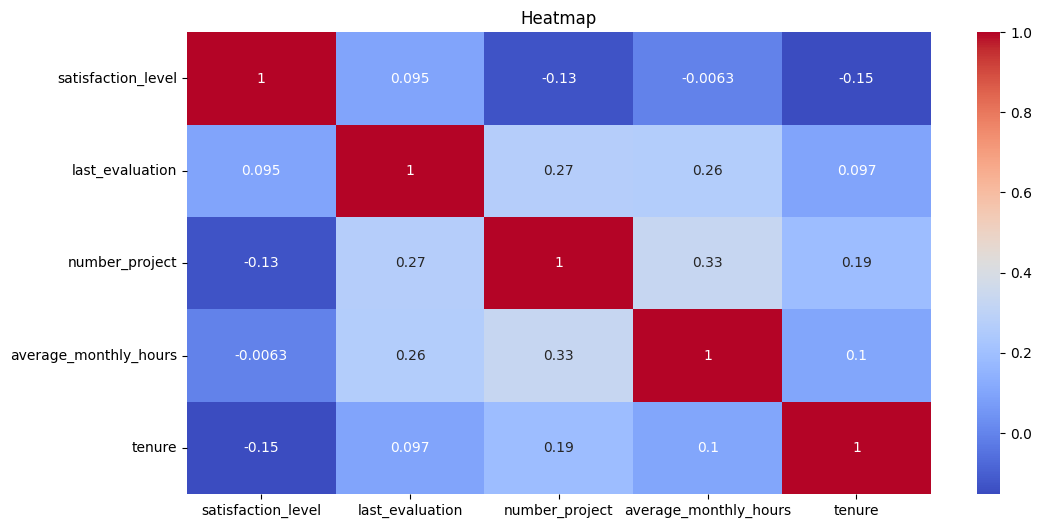

In [ ]:
# plot a heatmap

plt.figure(figsize=(12, 6))
sns.heatmap(df_encoder [['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr(), annot=True, cmap="coolwarm")
plt.title('Heatmap')
plt.show();



#### Logistic regression is quite sensitive to outliers,
remove the outliers in the `tenure` column that were identified earlier.

In [ ]:
# Select rows without outliers in `tenure` and save result in df_log

df_log = df_encoder[(df_encoder['tenure'] >= lower_limit) & (df_encoder['tenure'] <= upper_limit)]

# Display
df_log.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


#### Perform Feature Selection

In [ ]:
# Select the relevant features

X = df_log[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure', 'work_accident', 'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium' , 'dept_IT', 'dept_RandD', 'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing', 'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical']]

# X.head()

In [ ]:
# drop the target column

y = df_log['left']

# y.head()

#### Split the data into training set and testing set.

In [ ]:
# Split the data into training set and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Construct a logistic regression model and fit it to the training dataset.

In [ ]:

log_reg = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)


#### Test the logistic regression model: use the model to make predictions on the test set.

In [ ]:
# Use the logistic regression model to get predictions on the test set

y_pred = log_reg.predict(X_test)


##### Create a confusion matrix to visualize the results of the logistic regression model.

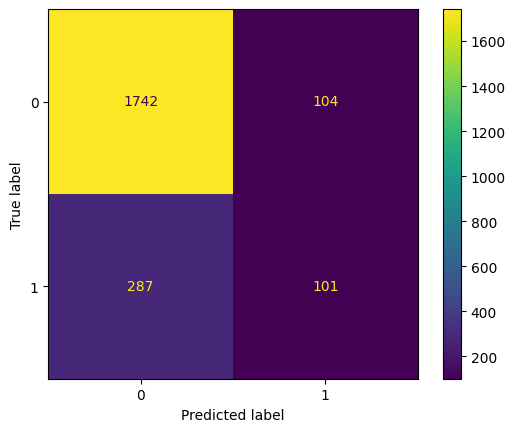

In [ ]:
# Compute values for confusion matrix
log_confusion = confusion_matrix (y_test, y_pred, labels=log_reg.classes_)

# Create display of confusion matrix
log_display = ConfusionMatrixDisplay (confusion_matrix=log_confusion, display_labels=log_reg.classes_)

# Plot confusion matrix
log_display.plot()

# Display plot
plt.show()

The confusion matrix provides a summary of the model's predictions and their accuracy.

*  True negatives: These are the instances where the model accurately predicted that an employee would not leave, and they indeed stayed in the company.

*  False positives: These occur when the model incorrectly predicted that an employee would leave, but they actually stayed.

*  False negatives: These occur when the model incorrectly predicted that an employee would stay, but they actually left.

*  True positives: These represent the instances where the model accurately predicted that an employee would leave, and they indeed left the company.

Note: A perfect model would have all true negatives and true positives, meaning it correctly predicts all employees who stay and leave, without any false negatives or false positives.

#### Check how balanced the data is. [check the value counts in the `left` column]

In [ ]:

df_log['left'].value_counts(normalize=True)


0    0.831468
1    0.168532
Name: left, dtype: float64

##### The dataset exhibits a class distribution of approximately 83% for the "stayed" (0) and 17% for the "left" (1). While the data is not perfectly balanced, it is not severely imbalanced either.

#### Evaluate model performance: create a classification report that includes precision, recall, f1-score, and accuracy metrics.

In [ ]:
# Create classification report for logistic regression model

target_names = ['Predicted would not leave', 'Predicted would leave']

print(classification_report(y_test, y_pred, target_names=target_names))


                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      1846
    Predicted would leave       0.49      0.26      0.34       388

                 accuracy                           0.82      2234
                macro avg       0.68      0.60      0.62      2234
             weighted avg       0.80      0.82      0.80      2234



The classification report above shows that the model achieved:

*   precision of 80%
*   recall of 82%
*   f1-score of 80%
*   accuracy of 82%

#### Logistic Regression feature importance

In [ ]:
log_reg_importances = pd.DataFrame(log_reg.coef_[0], columns=['importance'], index=X.columns)
log_reg_importances = log_reg_importances.sort_values(by='importance', ascending=False)

log_reg_importances.head()

,importance
tenure,1.050368
salary_low,0.249732
dept_sales,0.085593
average_monthly_hours,0.003501
dept_technical,-0.005140


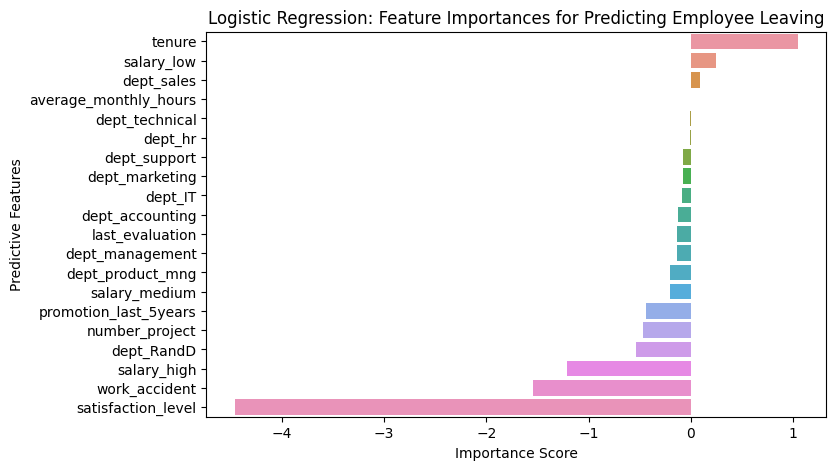

In [ ]:
# Visualize the feature importances

plt.figure(figsize=(8, 5))
sns.barplot(data=log_reg_importances, x="importance", y=log_reg_importances.index, orient='h')
plt.title("Logistic Regression: Feature Importances for Predicting Employee Leaving", fontsize=12)
plt.ylabel("Predictive Features")
plt.xlabel("Importance Score")

plt.show()

#### Convert categorical variables into numerical

### Random Forest

In [ ]:
# Use One-hot encoding to convert the categorical variables to numerical and save result in df_rf

df_rf = pd.get_dummies(df1)


#### Perform Feature Selection

In [ ]:
# Select the features

X = df_rf.drop('left', axis=1)

# X.head()

In [ ]:
# Isolate the outcome variable

y = df_rf['left']

# y.head()

#### Split the data into training, validating, and testing sets.

In [ ]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Create train & validate data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)


#### Construct a random forest model and set up cv grid-search to exhuastively search for the best model parameters.

In [ ]:
# model

rf = RandomForestClassifier(random_state=0)

##### breakdown of the hyperparameters and their values in cv_params:

cv_params = {'max_depth': [3,5, None],'max_features': [1.0],'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],'min_samples_split': [2,3,4],'n_estimators': [300, 500],
             }

# max_depth: indicate a depth of 3, 5, and no maximum depth (unrestricted depth).

# max_features: [1.0] suggests that the grid search will use all the features for each split.

# max_samples: indicate that the grid search will consider 70% and 100% of the samples.

# min_samples_leaf: suggest that the grid search will explore 1 sample, 2 samples, and 3 samples.

# min_samples_split:indicate that the grid search will consider 2 samples, 3 samples, and 4 samples.

# n_estimators: suggest that the grid search will consider 300 trees and 500 trees.

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

# GridSearchCV is used for hyperparameter tuning and performs cross-validation to determine the optimal combination.

# The "cv" parameter is set to 4, indicating that a 4-fold cross-validation will be performed during the grid search.

# the "refit" indicating that the model will be refit using the best hyperparameters found based on the ROC AUC metric.


#### Fit the random forest model to the training data.

In [ ]:
%%time

rf1.fit(X_tr, y_tr)


CPU times: user 25min 21s, sys: 3.25 s, total: 25min 24s
Wall time: 25min 33s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'recall', 'roc_auc', 'accuracy', 'precision', 'f1'})

##### AUC score achieved on the training set.

In [ ]:
# Check best AUC score on CV

rf1.best_score_

0.9795790967836983

##### Identify values for the parameters of the model.

In [ ]:
# Check best params

rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

#### Extract all the scores from the grid search

In [ ]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc

    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                 'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,'AUC': auc,'Precision': precision,'Recall': recall,
                        'F1': f1,'Accuracy': accuracy, },
                        ignore_index=True
                       )

    return table

##### Evaluation score on the training set for the random forest models

In [ ]:
rf1_cv_results = make_results('Random Forest CV', rf1, 'auc')

rf1_cv_results

<ipython-input-74-6697ac6063ba>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,'AUC': auc,'Precision': precision,'Recall': recall,


,Model,AUC,Precision,Recall,F1,Accuracy
0,Random Forest CV,0.979579,0.943576,0.923021,0.933145,0.978037


The evaluation scores of the random forest model are better than those of the logistic regression model. This indicates that the random forest model outperforms the logistic regression model.

##### Get all the scores from model's predictions.

In [ ]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = round(roc_auc_score(y_test_data, preds), 3)
    accuracy = round(accuracy_score(y_test_data, preds), 3)
    precision = round(precision_score(y_test_data, preds), 3)
    recall = round(recall_score(y_test_data, preds), 3)
    f1 = round(f1_score(y_test_data, preds), 3)

    table = pd.DataFrame({'model': [model_name], 'AUC': [auc],'precision': [precision],
                        'recall': [recall],'f1': [f1],'accuracy': [accuracy]
                        })

    return table

##### Validation score

In [ ]:
# Get the results on validation set for both models

rf1_val_results = get_scores('random forest-1 val', rf1, X_val, y_val)

rf1_val_results

,model,AUC,precision,recall,f1,accuracy
0,random forest-1 val,0.954,0.955,0.917,0.936,0.979


##### predict on the test score.

In [ ]:
# Get predictions on test data

rf1_test_scores = get_scores('random forest-1 test', rf1, X_test, y_test)

rf1_test_scores

,model,AUC,precision,recall,f1,accuracy
0,random forest-1 test,0.955,0.961,0.917,0.938,0.98


The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, you can be more confident that your model's performance on this data is representative of how it will perform on new, unseeen data.

### Feature Engineering

The high evaluation scores in the model may be due to data leakage.
In this case, it's likely that not all employees' satisfaction levels are reported, introducing potential data leakage. Additionally, the average_monthly_hours column could contribute to data leakage if employees who are already planning to leave or targeted for termination work fewer hours.

To address this, I will perform feature engineering to improve the models. One approach is to drop the satisfaction_level variable and create a new feature called overworked, which indicates whether an employee is overworked. This new feature will be binary, capturing the notion of being overworked or not.

In [ ]:
# Drop `satisfaction_level` and save result in df_feat

df_feat = df1.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df_feat.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.53,2,157,3,0,1,0,sales,low
1,0.86,5,262,6,0,1,0,sales,medium
2,0.88,7,272,4,0,1,0,sales,medium
3,0.87,5,223,5,0,1,0,sales,low
4,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Create new `overworked` column, by defining `overworked` as working > 175 hrs/week

df_feat['overworked'] = df_feat['average_monthly_hours']

# Define `overworked` as working > 180 hours/month
# To make the `overworked` column binary, reassign the column using a boolean mask
# `True` for > 180 and `False` for ≤ 175
# `.astype(int)` converts all `True` to `1` and all `False` to `0`

df_feat['overworked'] = (df_feat['overworked'] > 180).astype(int)

# Display

df_feat['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day.

overworked is defined as working more than 180 hours per month on average.

##### Drop `average_monthly_hours` column.



In [ ]:
# Drop the `average_monthly_hours` column
df_feat = df_feat.drop('average_monthly_hours', axis=1)

# Display
df_feat.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,department,salary,overworked
0,0.53,2,3,0,1,0,sales,low,0
1,0.86,5,6,0,1,0,sales,medium,1
2,0.88,7,4,0,1,0,sales,medium,1
3,0.87,5,5,0,1,0,sales,low,1
4,0.52,2,3,0,1,0,sales,low,0


##### Convert categorical variables to numerical

In [ ]:
# One-hot encode the categorical variables as needed and save result in df3
df3 = pd.get_dummies(df_feat)

# Display the new dataframe
df3.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,overworked,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.87,5,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


#### Feature selection

In [ ]:
# Select the features

X = df3.drop('left', axis=1)

#X.head()

In [ ]:
# Isolate the target column

y = df3 ['left']

# y.head()

#### Split the data into training, validating, and testing sets.

In [ ]:
# Create test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Create train & validate data

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

#### Random forest after Feature engineering

In [ ]:
# Instantiate model
rf2 = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None],'max_features': [1.0],'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],'min_samples_split': [2,3,4],'n_estimators': [300, 500],
             }

# scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# GridSearch
rf_feat = GridSearchCV(rf2, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
#train

%%time

rf_feat.fit(X_tr, y_tr)

CPU times: user 19min 19s, sys: 3.05 s, total: 19min 22s
Wall time: 19min 31s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'recall', 'roc_auc', 'accuracy', 'precision', 'f1'})

##### Check best params, AUC score on CV, CV scores

In [ ]:
# Check best params

rf_feat.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
# Check best AUC score on CV

rf_feat.best_score_

0.9654508322107869

In [ ]:
# Get all CV scores
rf_feat_cv_results = make_results('random forest2 cv', rf_feat, 'auc')

print(rf_feat_cv_results)

               Model       AUC  Precision    Recall        F1  Accuracy
0  random forest2 cv  0.965451   0.912312  0.885367  0.898451  0.966778


<ipython-input-74-6697ac6063ba>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,'AUC': auc,'Precision': precision,'Recall': recall,



##### Test the models on the validation set now.

In [ ]:
# Collect validation scores

rf_feat_val_results = get_scores('random forest-2 val',rf_feat, X_val, y_val)

rf_feat_val_results

,model,AUC,precision,recall,f1,accuracy
0,random forest-2 val,0.931,0.902,0.882,0.892,0.965


In [ ]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest-2 test', rf_feat, X_test, y_test)

rf2_test_scores

,model,AUC,precision,recall,f1,accuracy
0,random forest-2 test,0.934,0.894,0.889,0.892,0.964



##### Plot a confusion matrix to visualize how well it predicts on the test set.

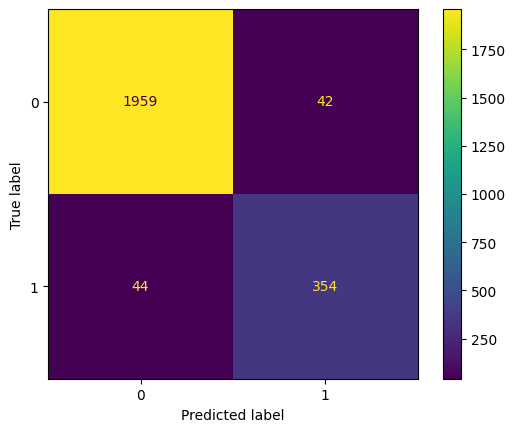

In [ ]:
# Generate array of values for confusion matrix
preds = rf_feat.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf_feat.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_feat.classes_)

disp.plot();

The model tends to have a higher number of false positives compared to false negatives, indicating that it may mistakenly identify some employees as being at risk of leaving or being fired when they are actually not. Despite this, the model still demonstrates overall strong performance.

#### Random forest feature importance

Now, plot the feature importances for the random forest model.

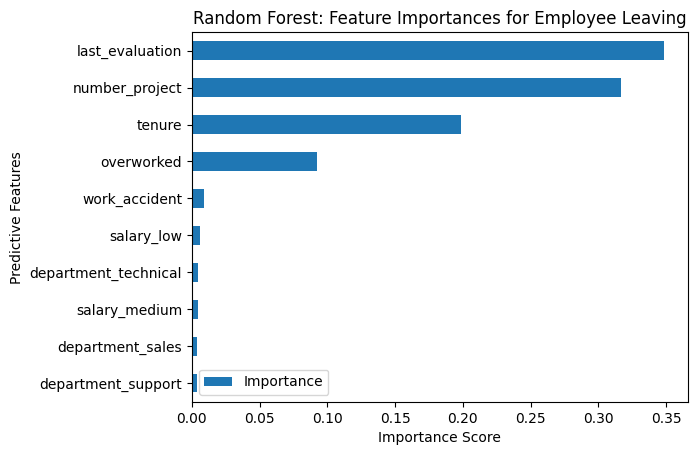

In [ ]:
# Get feature importances
feat_impt = rf_feat.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf_feat.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Predictive Features")
ax1.set_xlabel("Importance Score")

plt.show();

The plot above shows that in this random forest model, `last_evaluation`, `number_project`, `tenure`, `overworked`, `work_accident`, and `salary_low` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

### Recall evaluation metrics

**AUC (Area Under the Curve)** represents the probability that the model will correctly rank a randomly selected positive example higher than a randomly selected negative example based on their predicted probabilities.

**Precision** is a measure of the proportion of data points predicted as true positives that are actually true positives. It quantifies the accuracy of positive predictions.

**Recall**, also known as sensitivity or true positive rate, measures the proportion of actual positive data points that are correctly identified as positive by the model. It captures the model's ability to identify positive instances.

**Accuracy** is a metric that measures the proportion of correctly classified data points, regardless of their true class. It provides an overall assessment of the model's correctness.

**F1-score** is a combined metric that balances precision and recall. It is the harmonic mean of precision and recall, providing a single value that represents the model's performance on both metrics. It is useful when there is an imbalance between the classes.

### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%, on the test set.

**Random Forest Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 93.4%, precision of 89.4%, recall of 88.9%, f1-score of 89.2%, and accuracy of 96.4%, on the test set.

The random forest model outperformes the logistic regression model.

## Conclusion and Recommendations

The analysis and feature importances extracted from the models strongly indicate that employees at the company are facing high workload and overworking. Based on these findings, the following recommendations can be made to address the issue and improve employee retention:

*  Implement a project workload limit to prevent employees from being List item overwhelmed and spread too thin.

*  Focus on promoting employees who have been with the company for at least four years, as they may have accumulated valuable experience and loyalty. Additionally, investigate the reasons behind the dissatisfaction among employees with four years of tenure.

*  Consider adjusting compensation or recognition for employees who consistently work longer hours, or reevaluate the requirement for excessive overtime.

*  Ensure that employees are well-informed about the company's overtime pay policies and provide clear expectations regarding workload and time off.

*  Facilitate open discussions and feedback sessions at both company-wide and team levels to address work culture concerns and make necessary improvements. List item

*  Reevaluate the evaluation process to ensure that high evaluation scores are not solely dependent on working excessively long hours. Consider implementing a more balanced and proportional approach to reward employees based on their contributions and efforts.

Moving forward, it is important to address concerns related to potential data leakage. Analyze the impact of removing the "last_evaluation" feature on predictions to assess its significance and evaluate the model's performance without it. Additionally, explore the possibility of predicting other factors such as performance scores or satisfaction levels, which could provide additional insights into employee retention.